<a href="https://colab.research.google.com/github/knolasco/Coffee-Classification-by-Cupper-Ratings/blob/main/Coffee_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

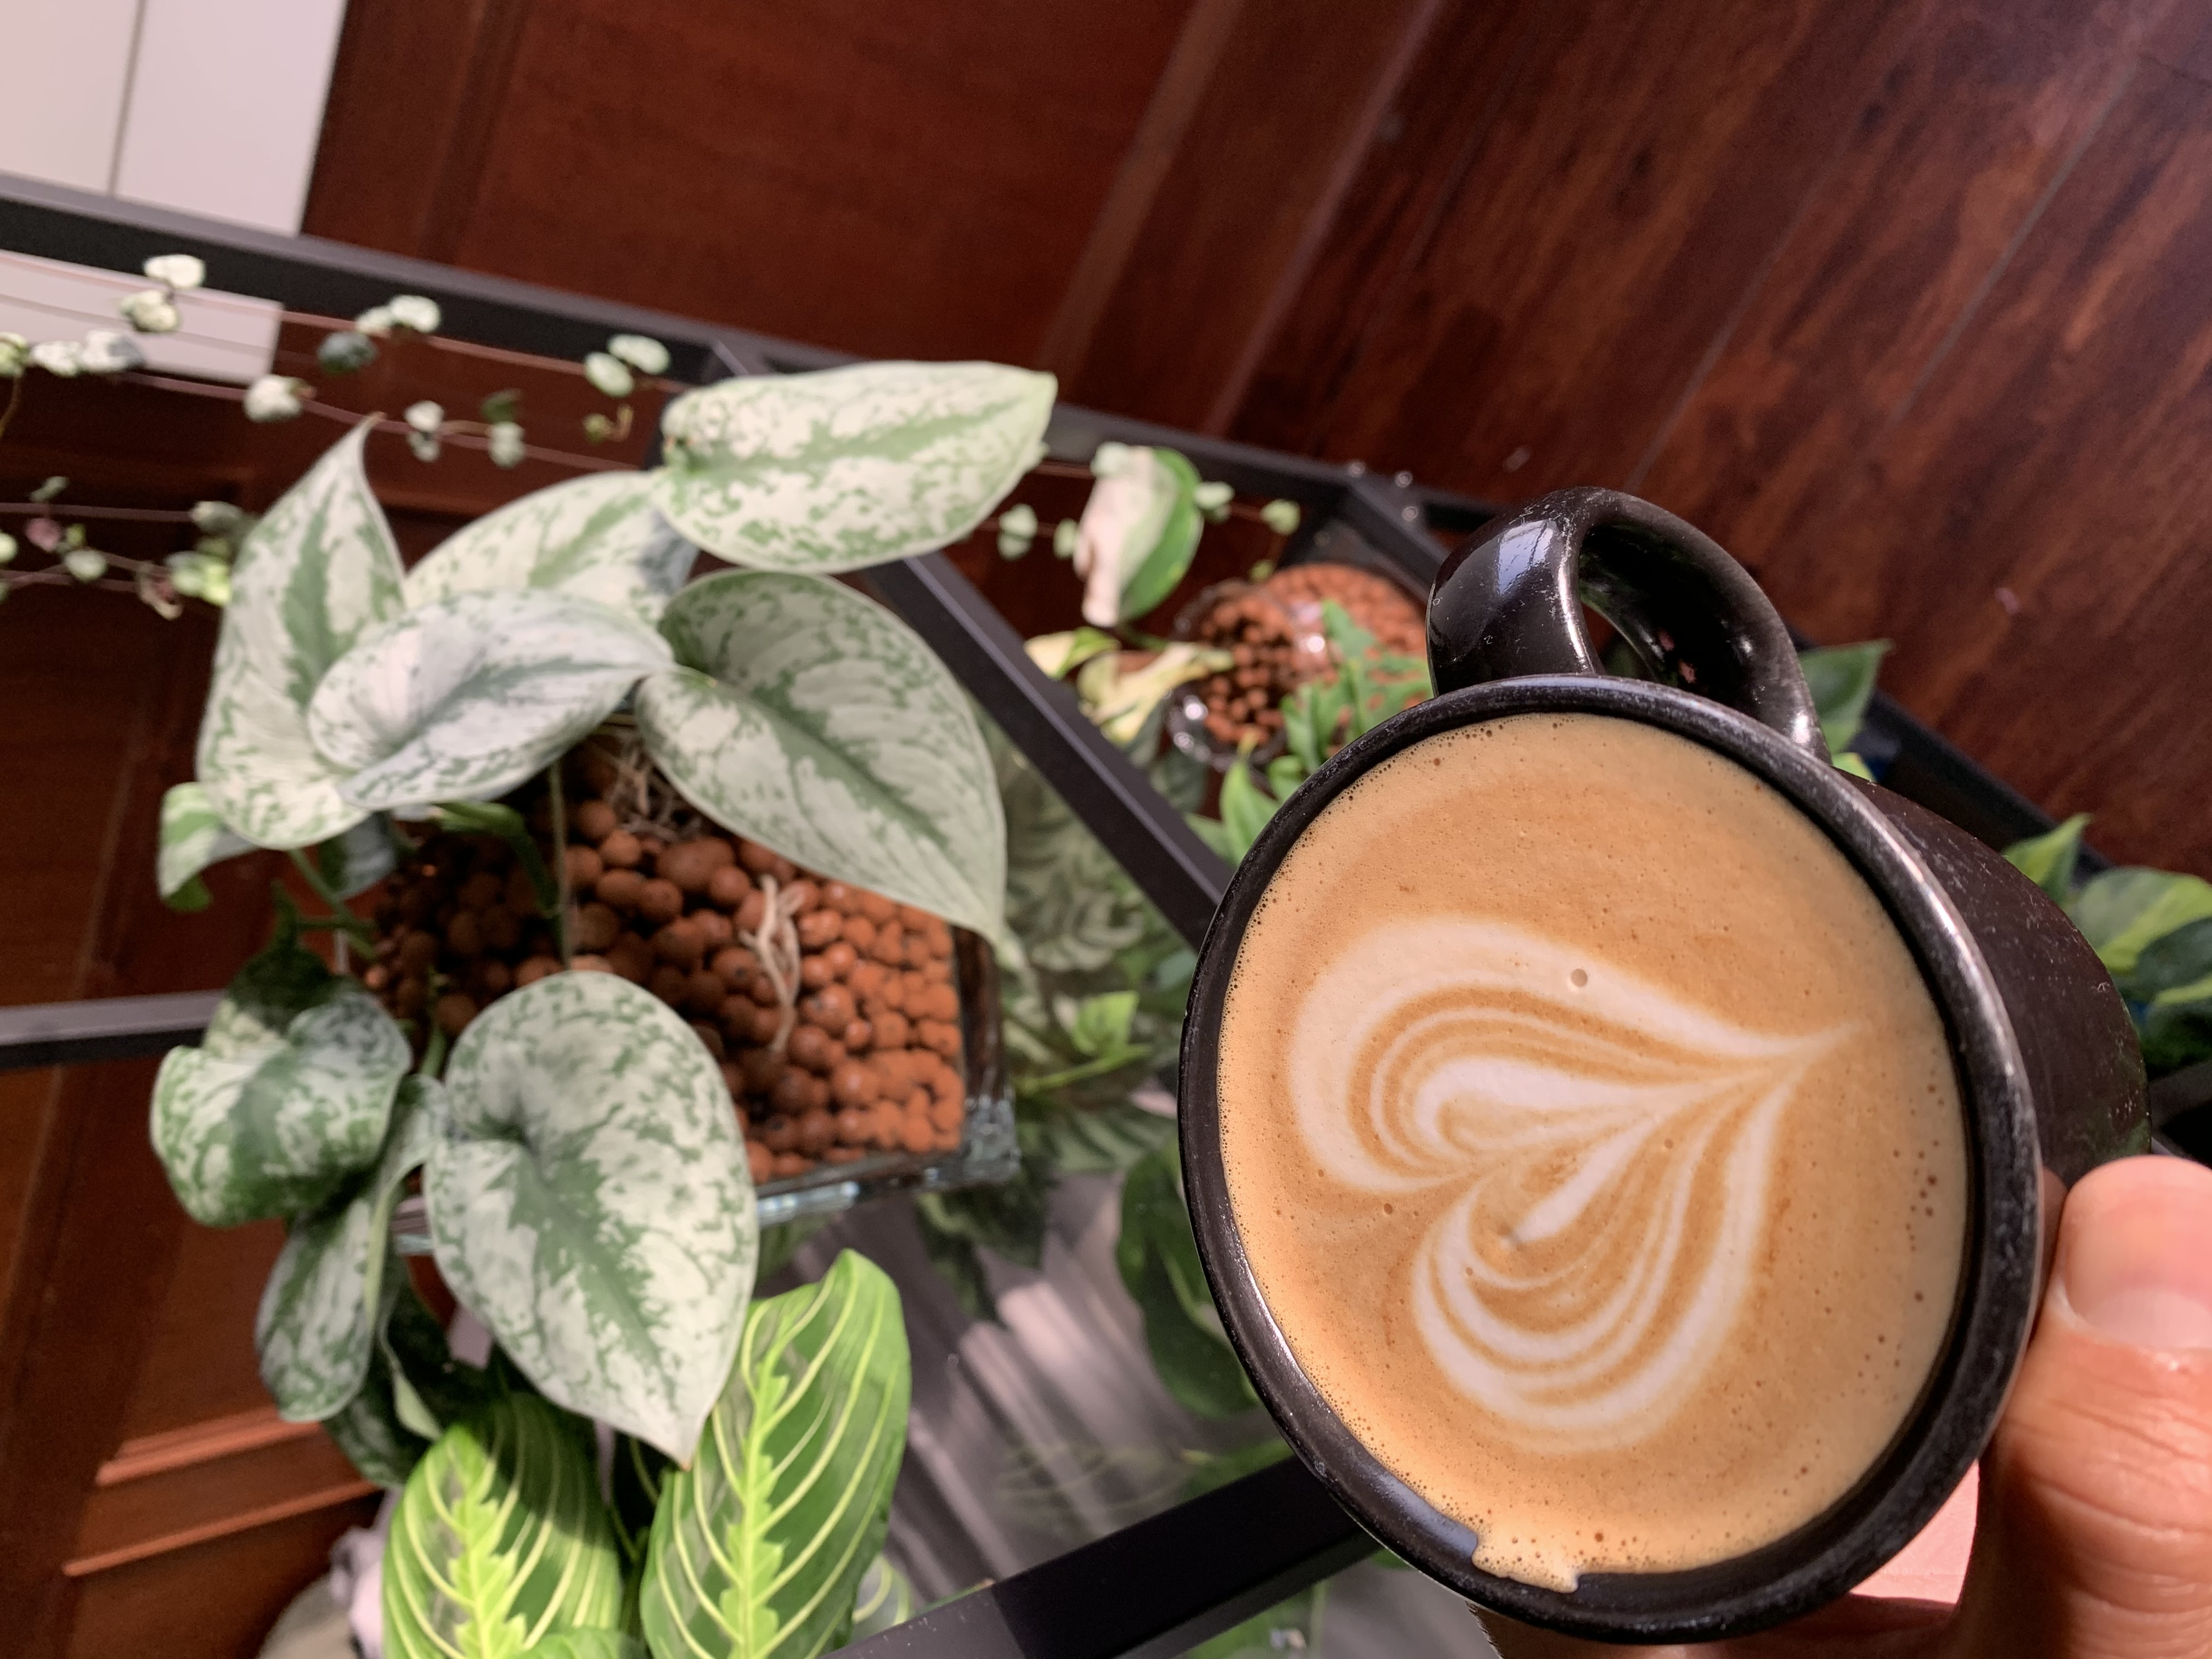

# Introduction

Specialty coffee's popularity has grown in the last few years. The purpose of Specialty Coffee is to control and optimize all aspects of the coffee experience: from the way the coffee is processed to the way it is grinded and brewed.

Coffee that is characterized as "Specialty Coffee" is scored higher than 80 points on a 100 point scale. Coffees are scored through a process called "coffee cupping" where a coffee is tasted and graded for a variety of characteristics, such as Aroma, Sweetness, Body, Flavor, etc. 

The purpose of this project is to experiment with the cupping scores of different coffees to see if we could predict the processing method of the coffee.

# Methods

We are attempting to predict the processing method of different coffees using their cupping scores. Since the target variable is categorical, this project focuses on four categorical algorithms: Logistic Regression, Random Forest, K-Nearest Neighbors, and Bagging Classification.

Each method is first attempted without any parameter tuning, and then re-evaluated with parameter tuning using GridSearchCV.


To begin, we import the necessary packages.

In [40]:
import pandas as pd # for reading data
import numpy as np # for linear algebra

import matplotlib.pyplot as plt # for visualizing data
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # scaling the data
from sklearn.model_selection import GridSearchCV # for optimizing our parameters
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

Next, we read the data and consider it's shape. The data for this project was taken from the following kaggle dataset:
https://www.kaggle.com/ankurchavda/coffee-beans-reviews-by-coffee-quality-institute

In [56]:
# let's read the data
file_path = 'https://github.com/knolasco/Coffee-Classification-by-Cupper-Ratings/raw/main/Coffee-modified%20(1).csv'
coffee_data = pd.read_csv(file_path)
print(coffee_data.shape)

(1319, 44)


The features that we want to use for this project are the numeric variables. First we find which variables those are, then we drop rows that have missing values. We can see the shape after dropping missing values.

In [57]:
# let's grab the numeric data
numeric = [col for col in coffee_data.columns
           if coffee_data[col].dtypes == 'float64']

# let's drop any na's in the numeric data
coffee_data.dropna(subset = numeric, inplace = True)
print(coffee_data.shape)

(1081, 44)


We dropped a little under 300 rows. This might not be the best method but it is what we are going with. Next we observe the data types of each variable.

In [58]:
coffee_data.dtypes

ID                        object
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags            object
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                     object
Flavor                    object
Aftertaste                object
Acidity                   object
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points             object
Total.Cup.

You can see that a few columns (Aroma, Flavor, Aftertaste, Acidity) are "objects" when they really should be floats.

In [59]:
# I want to change the types for the following columns into floats
col_to_change = ['Aroma','Flavor','Aftertaste','Acidity']

for col in col_to_change:
  coffee_data[col] = coffee_data[col].astype('float64')

print(coffee_data.dtypes)

ID                        object
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags            object
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points             object
Total.Cup.

Now that the features are numeric, we can begin looking at the target variable, "Processing.Method". We will also drop rows with missing data.

In [62]:
# I want to try to predict processing.method
# let's see what methods we have
print(coffee_data.groupby('Processing.Method')['Processing.Method'].count())
# let's drop na's
coffee_data.dropna(subset = ['Processing.Method'], inplace = True)

Processing.Method
Natural / Dry                178
Other                         25
Pulped natural / honey        10
Semi-washed / Semi-pulped     53
Washed / Wet                 736
Name: Processing.Method, dtype: int64


Now that the target variable is ready, we will split the data into train and validation sets. We also take this moment to scale the train and validation features.

In [4]:
# let's split the data into train and valid
# first we grab the numeric columns and that will be X
numeric = [col for col in coffee_data.columns
           if coffee_data[col].dtypes == 'float64']

# I don't want to use category.2.defects, or anything about the altitude
to_remove = ['Category.Two.Defects','altitude_low_meters','altitude_high_meters','altitude_mean_meters']
for col in to_remove:
  numeric.remove(col)

# separate the features and predictors
X = coffee_data[numeric]
Y = coffee_data['Processing.Method']

x_train, x_valid, y_train, y_valid = train_test_split(X,Y, train_size = 0.60, random_state = 0)

# scale the data
scaler = StandardScaler()
scaler.fit(x_train)

x_train_names = x_train.columns
x_valid_names = x_valid.columns

# this will remvoe the column names, so I add them back after
x_train = pd.DataFrame(scaler.transform(x_train))
x_valid = pd.DataFrame(scaler.transform(x_valid))

x_train.columns = x_train_names
x_valid.columns = x_valid_names

# Visualizations
Now that we have properly split the data, we can visualize it. For each variable in X, we create a plot its distribution.

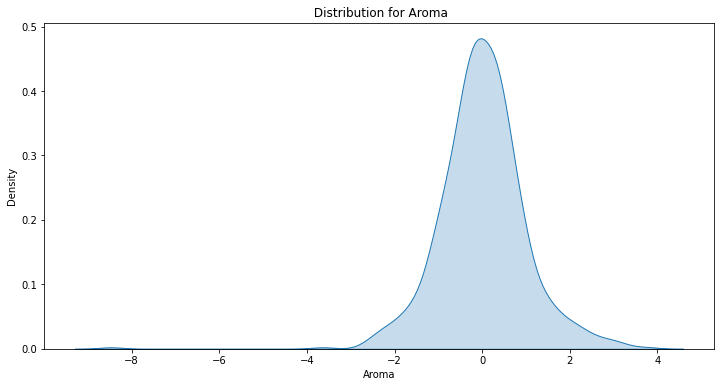

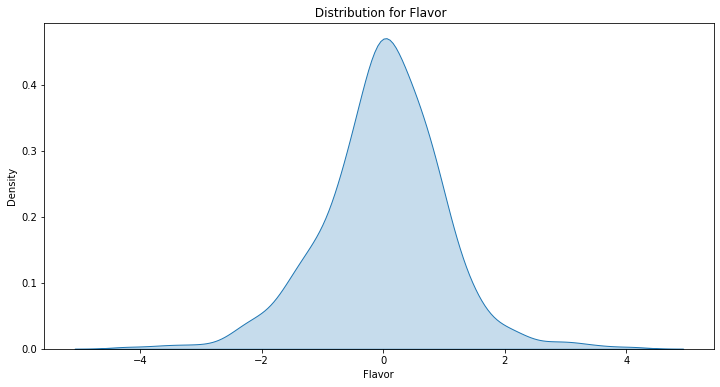

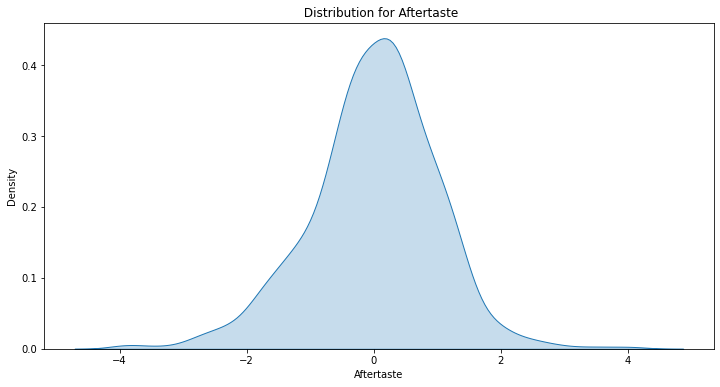

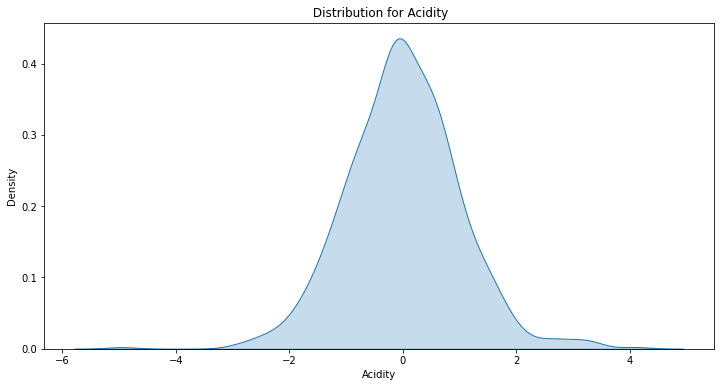

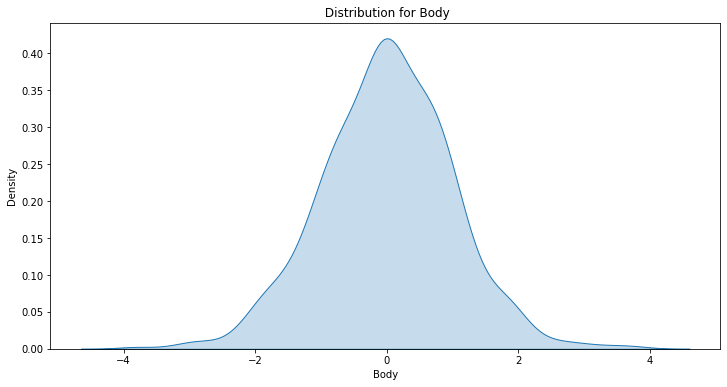

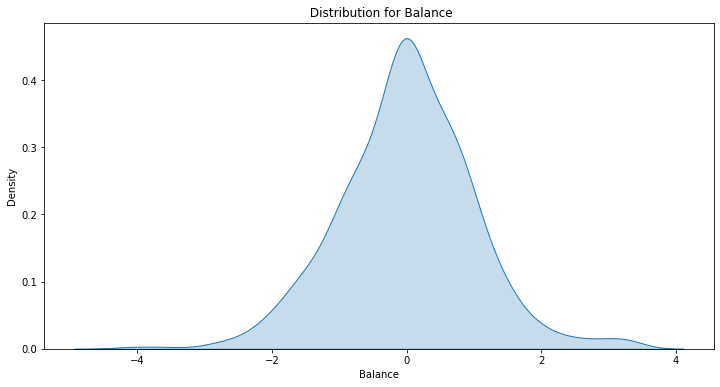

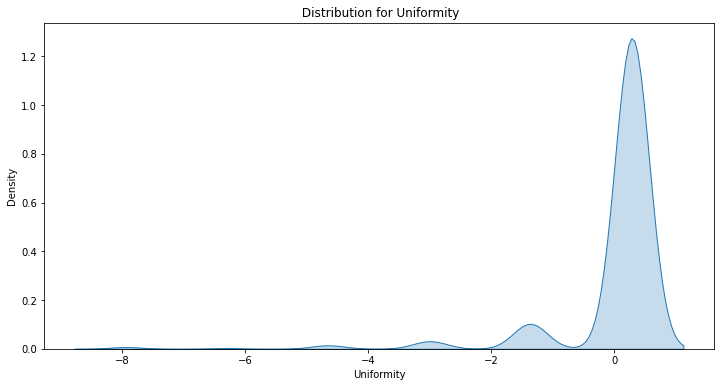

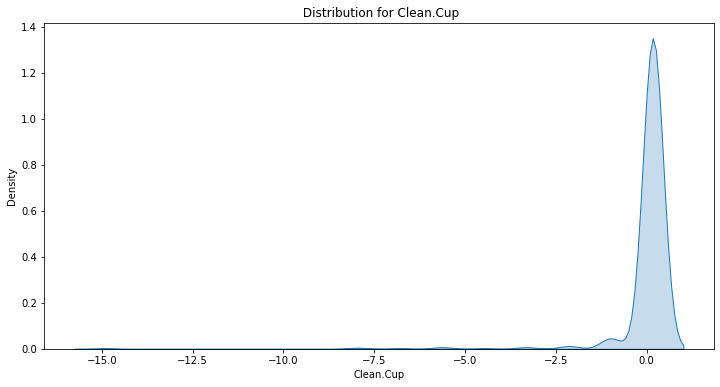

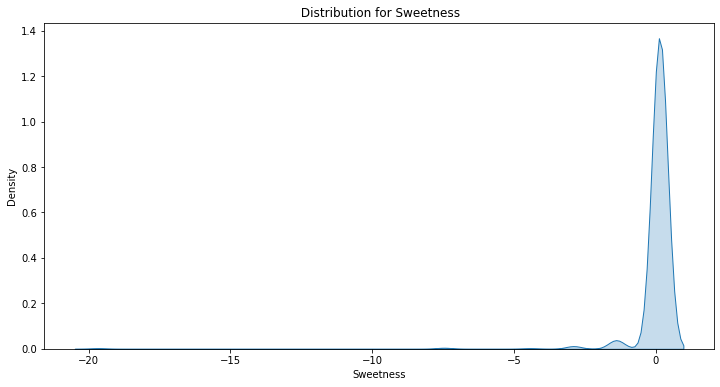

In [5]:
# let's visualize the data
for col in x_train.columns:
  plt.figure(figsize = (12,6))
  sns.kdeplot(x = x_train[col], shade = True).set_title(' Distribution for {}'.format(col))

# all of the data is uniformly distributed

The next visualization I would like to use is a heatmap. I think it is neat to see how correlated the variables are to each other. I probably could use what I see to teak or modify the variables but I am not sure how to do that. So the heatmap is shown for fun. 

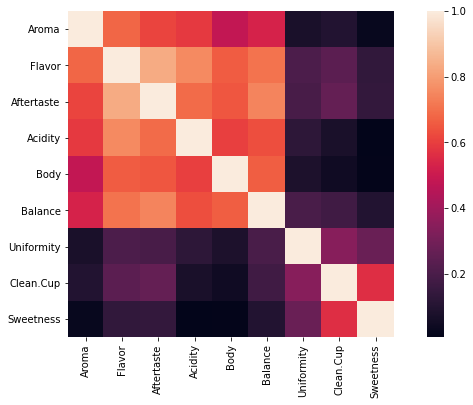

In [6]:
# let's see the correlations by a heatmap
corr = x_train.corr()
plt.figure(figsize = (12,6))
sns.heatmap(data = corr, square = True)


# Building Models

Finally, we start building models that will predict the processing method.

## Logistic Regression

The first model we consider is a Logistic Regression model.

In [74]:
# let's build our first model: Logistic Regression
logistic_model = LogisticRegression(max_iter= 5000)
logistic_model.fit(x_train, y_train)
predictions = logistic_model.predict(x_valid)

# let's see how the model performed
print('The accuracy of Logistic Regression is: {:.2f}%'.format(accuracy_score(y_valid, predictions)))

The accuracy of Logistic Regression is: 0.72%


Here we achieve an accuracy of 72%. Not that bad! We will try to improve this model using GridSearchCV.

In [67]:
# let's try to improve the model
# the param_grid was obtained from the following link
# https://www.kaggle.com/funxexcel/p2-logistic-regression-hyperparameter-tuning
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
log_model = LogisticRegression()
log_model_cv = GridSearchCV(log_model, cv = 3, param_grid = param_grid)

#fit the model
best_model = log_model_cv.fit(x_train, y_train)

#predict
predictions = best_model.predict(x_valid)

# let's see how the model performed
print('The accuracy of Logistic Regression with tuned parameters is: {:.2f}%'.format(accuracy_score(y_valid, predictions)))

The accuracy of Logistic Regression with tuned parameters is: 0.72%


Using GridSearchCV, we get an accuracy of 73%. This improved slightly, so that's good. The optimal parameters are shown below.


In [63]:
best_model.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

## Random Forest

Now we try to get better results using a Random Forest model.

In [13]:
# now let's try using a random forest

rf_model = RandomForestClassifier(n_estimators = 500, random_state = 0)
rf_model.fit(x_train,y_train)
predictions = rf_model.predict(x_valid)

In [14]:
# let's see how the model performed
print('The accuracy of Random Forest is: {:.2f}%'.format(accuracy_score(y_valid, predictions)))

The accuracy of Random Forest is: 0.71%


Surprisingly, this model wasn't as good as Logistic Regression's first model. We will try to improve using GridSearchCV.

In [16]:
# let's try to improve the model using GridSearchCV

param_grid = {'n_estimators' : [100,200,500,750],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' : ['gini', 'entropy']
              }
rf_model2 = RandomForestClassifier(random_state = 0)
rf_model_cv = GridSearchCV(rf_model2, param_grid = param_grid, cv = 3)

# fit the model
best_model_rf = rf_model_cv.fit(x_train, y_train)

# predict
predictions = best_model_rf.predict(x_valid)

In [17]:
# let's see how the model performed
print('The accuracy of Random Forest with optimal parameters is: {:.2f}%'.format(accuracy_score(y_valid, predictions)))

The accuracy of Random Forest with optimal parameters is: 0.73%


Again, the model improved, but only by 1%. The optimal parameters are shown below:

In [64]:
best_model_rf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 200}

## K-Nearest Neighbors

Now we try a K-Nearest Neighbors algorithm.

In [22]:
# now let's try KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors= 10)
kn_model.fit(x_train,y_train)

predictions = kn_model.predict(x_valid)

# let's see how the model performed
print('The accuracy of K Neighbors is: {:.2f}%'.format(accuracy_score(y_valid, predictions)))

The accuracy of K Neighbors is: 0.72%


Similar story to the previous models. We will now try GridSearchCV.

In [28]:
# lets try to optimize the hyperparameters using GridSearchCV

param_grid = {
    'n_neighbors' : [3,5,10,15],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute']
}

kn_model2 = KNeighborsClassifier()
kn_cv = GridSearchCV(kn_model2, param_grid = param_grid, cv = 3)
best_model_kn = kn_cv.fit(x_train, y_train)

predictions = best_model_kn.predict(x_valid)

In [29]:
# let's see how the model performed
print('The accuracy of K Neighbors with optimized parameters is: {:.2f}%'.format(accuracy_score(y_valid, predictions)))

The accuracy of K Neighbors with optimized parameters is: 0.73%


I'm starting to see a pattern here. There is barely an improvement in the model. Either way, it is an improvement. The best parameters are shown below:

In [65]:
best_model_kn.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}

## Bagging Classifier

This is my first time hearing about the Bagging Classifier. I am not sure exactly how it works yet but still wanted to try it out.

In [33]:
# now we using bagging classifier

bag_model = BaggingClassifier(random_state = 0)
bag_model.fit(x_train,y_train)
predictions = bag_model.predict(x_valid)

In [34]:
# let's see how the model performed
print('The accuracy of Bagging Classifier is: {:.2f}%'.format(accuracy_score(y_valid, predictions)))

The accuracy of Bagging Classifier is: 0.65%


This is not what I expected. I know that a Bagging Classifier is considered an Ensemble algorithm, so I expected it to do better than the previous models. Let's try to tune the parameters.

In [72]:
# lets try to tweak the parameters
param_grid = {
    'n_estimators' : [5,10,50,100],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

bag_model2 = BaggingClassifier(random_state = 0)
bag_cv = GridSearchCV(bag_model2, param_grid = param_grid, cv = 5)

best_model_bag = bag_cv.fit(x_train, y_train)


predictions = best_model_bag.predict(x_valid)

In [55]:
# let's see how the model performed
print('The accuracy of Bagging Classifier with optimal parameters is: {:.2f}%'.format(accuracy_score(y_valid, predictions)))

The accuracy of Bagging Classifier with optimal parameters is: 0.72%


There is a big improvement here! But still not better than 73%. The optimal parameters are shown below:

In [66]:
best_model_bag.best_params_

{'max_samples': 0.2, 'n_estimators': 100}

# Results

The best accuracy of all the models is 73%. This accuracy was achieved by optimizing the hyperparameters of the Logistic Regression, Random Forest, and K-Nearest Neighbors algorithms. It is worth noting that I did not look at the specificity or sensitivity of any of the models. Consider the predictions of the Random Forest Algorithm:

In [83]:
predictions = pd.DataFrame(best_model_rf.predict(x_valid))
print(predictions.groupby(0)[0].count())

0
Washed / Wet    401
Name: 0, dtype: int64


As we can see, the algorithm predicted "Washed/Wet" for every coffee's processing method. Since this project is meant as practice, I won't worry too much about it. In future projects, I will carefully consider the specificity and sensitivity.

# Conclusion

Although we attain an accuracy of 73% when predicting the processing methods of the coffees, there is much more to consider.

The dataset does not specify if the coffees are being rated by one person or many people. If it is a single person, then this person must have a bias and this data set is biased.

I learned a lot from this project! Thank you for reading.